In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ibov = pd.read_csv('../data/raw/^IBX50.csv', index_col=0, parse_dates=True)
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,7356.879883,7356.879883,7151.609863,7153.220215,7153.220215,0
2016-01-05,7152.919922,7222.669922,7152.919922,7208.580078,7208.580078,0
2016-01-06,7206.350098,7206.350098,7070.240234,7099.950195,7099.950195,0
2016-01-07,7099.779785,7099.779785,6918.560059,6918.560059,6918.560059,0
2016-01-08,6918.609863,7008.370117,6883.709961,6912.339844,6912.339844,0


In [3]:
ibov['^IBX50'] = ibov['Close'].pct_change(1)

In [4]:
index = pd.read_csv('../data/interim/ibovfull.csv', index_col=0, parse_dates=True)

In [5]:
itub = index[index['Name'] == 'MGLU3'].copy()

In [6]:
itub['MGLU3'] = itub['Close'].pct_change(1)

In [7]:
joined = itub[['MGLU3']].join(ibov['^IBX50'])

In [8]:
joined.head()

,MGLU3,^IBX50
Date,,
2016-01-04,NaN,NaN
2016-01-05,0.010026,0.007739
2016-01-06,-0.086600,-0.015070
2016-01-07,-0.132855,-0.025548
2016-01-08,0.004189,-0.000899


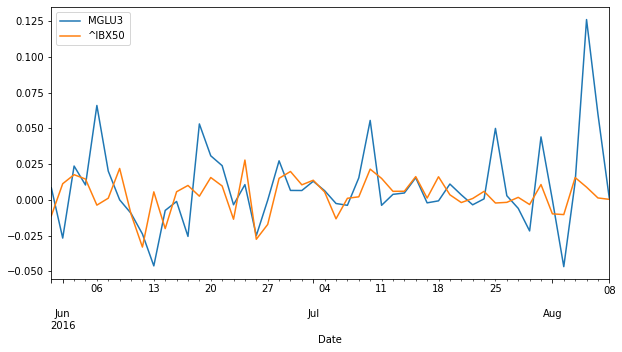

In [9]:
joined.iloc[100:150].plot(figsize=(10, 5));

<AxesSubplot:xlabel='^IBX50', ylabel='MGLU3'>

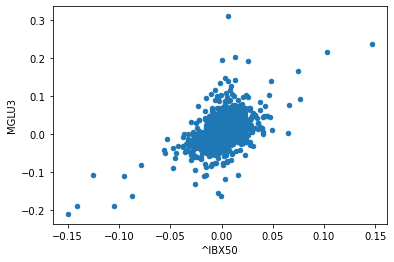

In [10]:
joined.plot.scatter('^IBX50', 'MGLU3')

In [11]:
# make the dataset
joined.dropna(inplace=True)
X = joined[['^IBX50']].to_numpy()
Y = joined[['MGLU3']].to_numpy()

In [12]:
X.shape, Y.shape

((1258, 1), (1258, 1))

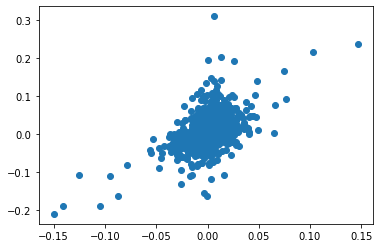

In [13]:
plt.scatter(X, Y);

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

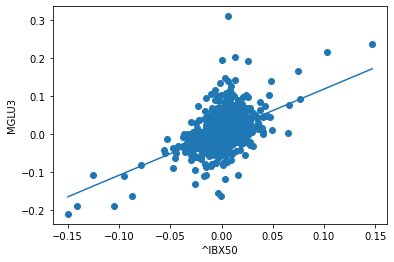

In [15]:
X_predict = np.linspace(X.min(), X.max(), 5).reshape(-1, 1)
Y_predict = model.predict(X_predict)

plt.scatter(X, Y);
plt.xlabel('^IBX50');
plt.ylabel('MGLU3');
plt.plot(X_predict, Y_predict);

In [16]:
beta = model.coef_
alpha = model.intercept_
alpha, beta

(array([0.00428154]), array([[1.13392988]]))

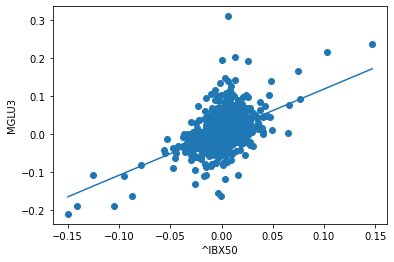

In [17]:
# Manual calulation

Y_predict = beta * X_predict + alpha

plt.scatter(X, Y);
plt.xlabel('^IBX50');
plt.ylabel('MGLU3');
plt.plot(X_predict, Y_predict);

In [18]:
joined.std()

MGLU3     0.039060
^IBX50    0.017796
dtype: float64

In [20]:
joined['MGLU3'].std() / joined['^IBX50'].std()

2.1948407429815666